In [22]:
%%capture
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

from processing import process_embedding_from_words
from taxonomy import (phi_edge, build_state, proba_state, TaxonomyModule,
                    plot_state_likelihood_and_gradient, plot_nx_graph)

%load_ext autoreload
%autoreload 2

## Training Data

In [2]:
# Training data

""" train_words = [
    "vertebrate", "mammal", "placental", "cow", "rodent", "rat", "metatherian",
    "marsupial", "kangaroo", "reptile", "diapsid", "squirrel", "snake",
    "crocodilian", "anapsid", "chelonian", "turtle"
] """


# Curated
train_words = [
    "vertebrate", "mammal", "placental", "cow", "rodent", "rat",
    "marsupial", "kangaroo", "reptile", "diapsid", "squirrel", "snake",
    "crocodilian", "turtle"
]

In [3]:
train_df_graph = pd.DataFrame(index=train_words, columns=train_words)

train_df_graph.loc["vertebrate", "mammal"] = 1
train_df_graph.loc["vertebrate", "reptile"] = 1
train_df_graph.loc["mammal", "placental"] = 1
# train_df_graph.loc["mammal", "metatherian"] = 1
train_df_graph.loc["placental", "cow"] = 1
train_df_graph.loc["placental", "rodent"] = 1
train_df_graph.loc["rodent", "squirrel"] = 1
train_df_graph.loc["rodent", "rat"] = 1
# train_df_graph.loc["metatherian", "marsupial"] = 1
train_df_graph.loc["marsupial", "kangaroo"] = 1
train_df_graph.loc["reptile", "diapsid"] = 1
# train_df_graph.loc["reptile", "anapsid"] = 1
train_df_graph.loc["diapsid", "snake"] = 1
train_df_graph.loc["diapsid", "crocodilian"] = 1
# train_df_graph.loc["anapsid", "chelonian"] = 1
# train_df_graph.loc["chelonian", "turtle"] = 1

# Correction
train_df_graph.loc["reptile", "turtle"] = 1
train_df_graph.loc["mammal", "marsupial"] = 1

train_df_graph = train_df_graph.fillna(0)
# train_df_graph.head()

## Play around

In [4]:
train_embedd = process_embedding_from_words(train_words)

In [5]:
w = np.random.randn(train_embedd.shape[-1])
phi_edge(0, 1, w, train_embedd, y=1), phi_edge(0, 1, w, train_embedd, y=0)

(0.004338661002179776, 1)

In [6]:
w = np.random.randn(train_embedd.shape[-1])
train_state = build_state(train_words, train_df_graph)
proba_state(w, train_state, train_words, train_embedd)

-344.98430106010574

In [7]:
dim_embedding = train_embedd.shape[-1]
proba_state(np.zeros(dim_embedding), train_state, train_words, train_embedd), (len(train_words)**2 - len(train_words))*np.log(0.5)

(-126.15278686191026, -126.15278686191004)

### Plots


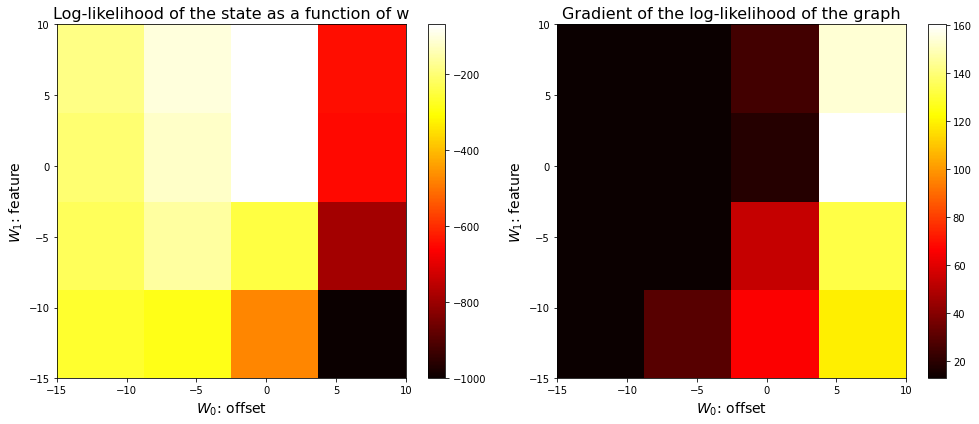

In [8]:
W_X, W_Y = np.meshgrid(np.linspace(-15, 10, 5), np.linspace(-15, 10, 5))

plot_state_likelihood_and_gradient(
    train_state, train_words, train_embedd, W_X, W_Y)

## Visualization

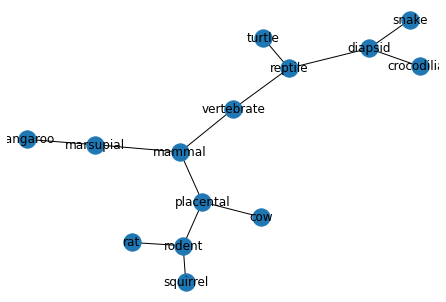

In [4]:
ground_truth = np.array([
    np.ones((train_df_graph.shape[0], train_df_graph.shape[1])),
    train_df_graph]).transpose(1, 2, 0)
plot_nx_graph(w=np.array([-3, 6]), words=train_words, embedding=ground_truth);

## Training procedure

In [8]:
taxonomy_module = TaxonomyModule(nb_features=53)

In [10]:
# NeverGrad
taxonomy_module.train(train_df_graph, nb_epochs=500, lr=None, bal_coef=5, verbose=False)

(7_w,15)-aCMA-ES (mu_w=4.5,w_1=34%) in dimension 53 (seed=nan, Mon Mar  8 22:00:01 2021)


In [12]:
# Gradient Descent
nb_epochs = 300
lr = 0.001
taxonomy_module.train(train_df_graph, nb_epochs, lr=lr, bal_coef=5, verbose=True)

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 1]: -145.16


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 2]: -142.92


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 3]: -140.94


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 4]: -139.20


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 5]: -137.64


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 6]: -136.24


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 7]: -134.99


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 8]: -133.85


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 9]: -132.82


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 10]: -131.89


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 11]: -131.04


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 12]: -130.26


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 13]: -129.55


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 14]: -128.90


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 15]: -128.30


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 16]: -127.75


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 17]: -127.25


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 18]: -126.78


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 19]: -126.34


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 20]: -125.94


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 21]: -125.57


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 22]: -125.22


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 23]: -124.89


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 24]: -124.58


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 25]: -124.29


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 26]: -124.02


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 27]: -123.77


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 28]: -123.53


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 29]: -123.30


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 30]: -123.08


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 31]: -122.87


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 32]: -122.68


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 33]: -122.49


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 34]: -122.31


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 35]: -122.14


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 36]: -121.98


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 37]: -121.82


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 38]: -121.67


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 39]: -121.53


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 40]: -121.39


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 41]: -121.26


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 42]: -121.13


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 43]: -121.01


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 44]: -120.89


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 45]: -120.77


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 46]: -120.66


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 47]: -120.56


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 48]: -120.45


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 49]: -120.35


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 50]: -120.26


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 51]: -120.16


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 52]: -120.07


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 53]: -119.99


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 54]: -119.90


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 55]: -119.82


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 56]: -119.74


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 57]: -119.66


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 58]: -119.59


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 59]: -119.52


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 60]: -119.45


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 61]: -119.38


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 62]: -119.31


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 63]: -119.25


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 64]: -119.18


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 65]: -119.12


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 66]: -119.06


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 67]: -119.01


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 68]: -118.95


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 69]: -118.90


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 70]: -118.84


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 71]: -118.79


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 72]: -118.74


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 73]: -118.69


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 74]: -118.64


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 75]: -118.60


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 76]: -118.55


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 77]: -118.51


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 78]: -118.46


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 79]: -118.42


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 80]: -118.38


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 81]: -118.34


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 82]: -118.30


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 83]: -118.26


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 84]: -118.23


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 85]: -118.19


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 86]: -118.15


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 87]: -118.12


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 88]: -118.09


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 89]: -118.05


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 90]: -118.02


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 91]: -117.99


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 92]: -117.96


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 93]: -117.93


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 94]: -117.90


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 95]: -117.87


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 96]: -117.84


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 97]: -117.81


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 98]: -117.78


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 99]: -117.76


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 100]: -117.73


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 101]: -117.70


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 102]: -117.68


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 103]: -117.66


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 104]: -117.63


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 105]: -117.61


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 106]: -117.58


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 107]: -117.56


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 108]: -117.54


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 109]: -117.52


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 110]: -117.50


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 111]: -117.47


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 112]: -117.45


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 113]: -117.43


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 114]: -117.41


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 115]: -117.39


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 116]: -117.38


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 117]: -117.36


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 118]: -117.34


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 119]: -117.32


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 120]: -117.30


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 121]: -117.29


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 122]: -117.27


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 123]: -117.25


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 124]: -117.23


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 125]: -117.22


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 126]: -117.20


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 127]: -117.19


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 128]: -117.17


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 129]: -117.16


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 130]: -117.14


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 131]: -117.13


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 132]: -117.11


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 133]: -117.10


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 134]: -117.09


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 135]: -117.07


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 136]: -117.06


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 137]: -117.04


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 138]: -117.03


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 139]: -117.02


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 140]: -117.01


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 141]: -116.99


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 142]: -116.98


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 143]: -116.97


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 144]: -116.96


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 145]: -116.95


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 146]: -116.94


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 147]: -116.92


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 148]: -116.91


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 149]: -116.90


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 150]: -116.89


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 151]: -116.88


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 152]: -116.87


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 153]: -116.86


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 154]: -116.85


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 155]: -116.84


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 156]: -116.83


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 157]: -116.82


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 158]: -116.81


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 159]: -116.80


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 160]: -116.80


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 161]: -116.79


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 162]: -116.78


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 163]: -116.77


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 164]: -116.76


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 165]: -116.75


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 166]: -116.74


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 167]: -116.74


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 168]: -116.73


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 169]: -116.72


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 170]: -116.71


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 171]: -116.70


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 172]: -116.70


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 173]: -116.69


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 174]: -116.68


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 175]: -116.68


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 176]: -116.67


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 177]: -116.66


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 178]: -116.65


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 179]: -116.65


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 180]: -116.64


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 181]: -116.63


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 182]: -116.63


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 183]: -116.62


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 184]: -116.61


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 185]: -116.61


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 186]: -116.60


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 187]: -116.60


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 188]: -116.59


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 189]: -116.58


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 190]: -116.58


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 191]: -116.57


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 192]: -116.57


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 193]: -116.56


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 194]: -116.56


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 195]: -116.55


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 196]: -116.55


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 197]: -116.54


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 198]: -116.54


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 199]: -116.53


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 200]: -116.53


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 201]: -116.52


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 202]: -116.52


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 203]: -116.51


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 204]: -116.51


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 205]: -116.50


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 206]: -116.50


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 207]: -116.49


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 208]: -116.49


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 209]: -116.48


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 210]: -116.48


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 211]: -116.48


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 212]: -116.47


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 213]: -116.47


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 214]: -116.46


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 215]: -116.46


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 216]: -116.45


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 217]: -116.45


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 218]: -116.45


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 219]: -116.44


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 220]: -116.44


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 221]: -116.44


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 222]: -116.43


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 223]: -116.43


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 224]: -116.42


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 225]: -116.42


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 226]: -116.42


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 227]: -116.41


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 228]: -116.41


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 229]: -116.41


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 230]: -116.40


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 231]: -116.40


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 232]: -116.40


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 233]: -116.39


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 234]: -116.39


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 235]: -116.39


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 236]: -116.39


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 237]: -116.38


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 238]: -116.38


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 239]: -116.38


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 240]: -116.37


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 241]: -116.37


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 242]: -116.37


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 243]: -116.36


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 244]: -116.36


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 245]: -116.36


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 246]: -116.36


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 247]: -116.35


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 248]: -116.35


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 249]: -116.35


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 250]: -116.35


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 251]: -116.34


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 252]: -116.34


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 253]: -116.34


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 254]: -116.34


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 255]: -116.33


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 256]: -116.33


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 257]: -116.33


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 258]: -116.33


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 259]: -116.32


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 260]: -116.32


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 261]: -116.32


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 262]: -116.32


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 263]: -116.32


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 264]: -116.31


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 265]: -116.31


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 266]: -116.31


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 267]: -116.31


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 268]: -116.31


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 269]: -116.30


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 270]: -116.30


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 271]: -116.30


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 272]: -116.30


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 273]: -116.30


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 274]: -116.29


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 275]: -116.29


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 276]: -116.29


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 277]: -116.29


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 278]: -116.29


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 279]: -116.28


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 280]: -116.28


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 281]: -116.28


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 282]: -116.28


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 283]: -116.28


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 284]: -116.28


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 285]: -116.27


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 286]: -116.27


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 287]: -116.27


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 288]: -116.27


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 289]: -116.27


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 290]: -116.27


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 291]: -116.26


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 292]: -116.26


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 293]: -116.26


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 294]: -116.26


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 295]: -116.26


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 296]: -116.26


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 297]: -116.26


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 298]: -116.25


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 299]: -116.25


  0%|          | 0/53 [00:00<?, ?it/s]

[Epoch 300]: -116.25


In [ ]:
plt.plot(taxonomy_module.losses);

In [26]:
print('f1_score: {:.3f}'.format(taxonomy_module.f1_score(train_df_graph)))

f1_score: 0.049


V_vertebrate_mammal 0.4898545843705258
V_vertebrate_placental 0.5158416466237002
V_vertebrate_cow 0.7588281223519827
V_vertebrate_rodent 0.3439367819534665
V_vertebrate_rat 0.7210155185447057
V_vertebrate_marsupial 0.49291203162526137
V_vertebrate_kangaroo 0.7204380236077863
V_vertebrate_reptile 0.29491822060003514
V_vertebrate_diapsid 0.3540284511888433
V_vertebrate_squirrel 0.7128388155679172
V_vertebrate_snake 0.6918738108939614
V_vertebrate_crocodilian 0.7156164413235118
V_vertebrate_turtle 0.6828708220105469
V_mammal_vertebrate 0.0962300642862935
V_mammal_placental 0.4018504091716907
V_mammal_cow 0.664879737116402
V_mammal_rodent 0.24844030030116462
V_mammal_rat 0.6197190326538834
V_mammal_marsupial 0.38001076740010786
V_mammal_kangaroo 0.6190426774532644
V_mammal_reptile 0.2087025266533324
V_mammal_diapsid 0.2568268676533809
V_mammal_squirrel 0.6101786487780618
V_mammal_snake 0.5860707704404737
V_mammal_crocodilian 0.6134107873760785
V_mammal_turtle 0.5758715099053797
V_placental

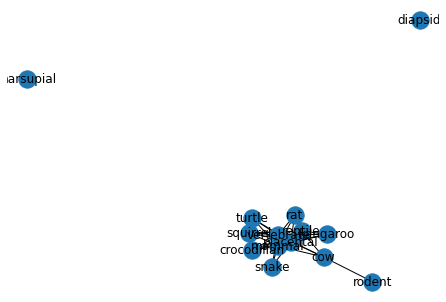

In [14]:
taxonomy_module.infer_graph(train_words, verbose=True);

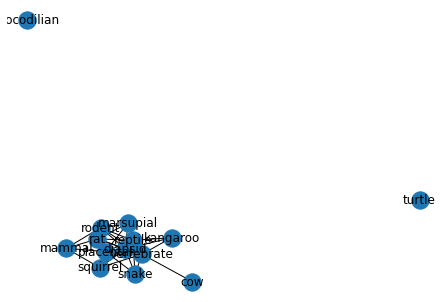

In [15]:
taxonomy_module.infer_graph(train_df_graph);

### Profiling

In [23]:
from graph import Graph
%load_ext line_profiler
taxonomy_module_lprun = TaxonomyModule(nb_features=53)
%lprun -f Graph.__init__ taxonomy_module_lprun.train(train_df_graph, nb_epochs=1, lr=1e-3, bal_coef=5, verbose=False)

Timer unit: 1e-06 s

Total time: 14.919 s
File: /home/clement/Desktop/taxonomy-project/graph.py
Function: __init__ at line 56

Line #      Hits         Time  Per Hit   % Time  Line Contents
    56                                               def __init__(self, dic_nodes, edge_names):
    57                                                   """
    58                                                   dic_nodes : dictionnary mapping the name of each node to the node.
    59                                                   edge_name : list containing the list of the form [node_name_1,node_name_2]
    60                                                               There is no need to put the nodes in both directions.
    61                                                   """
    62                                                   # We work with node NAMES and edge POINTERS
    63        54        173.0      3.2      0.0          self.dic_nodes = dic_nodes  # Maps names to nodes
    6

### Kirchhoff’s Matrix Tree Theorem (MTT)

In [28]:
from networkx.linalg.laplacianmatrix import laplacian_matrix
L_matrix = laplacian_matrix(G).todense()
nb_covering_trees = np.linalg.det(L_matrix[1:,1:])
nb_covering_trees